# WeatherPy
----

### Analysis
* The maximum temperature for cities nearer to the equator is higher as compared to those further away from the equator in northern and southern hemispheres. 
* There is no strong relationship between latitude and humidity.
* There is no strong relationship between latitude and cloudiness or wind speed. 
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
import api_keys


## Generate Cities List

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a settings object with API key and preferred units
settings = {"units": "metric", "appid": api_keys.api_key}

# Get data for each city in cities, print log while processing

summary = ["name","sys.country","coord.lat","coord.lon","dt","clouds.all","main.humidity","main.temp_max","wind.speed"]
weather_data=[]
rec_num=1

print("Beginning Data Retrieval")
print("----------------------------")


for city in cities:
    try:
        weather=ow.get_current(city, **settings)
        weather_data.append(weather(*summary))
        print(f'Processing record {rec_num} | {city}')
        rec_num=rec_num+1
    except:
        print(f"Skipping {city} - city not found")
        pass
    


Beginning Data Retrieval
----------------------------
Processing record 1 | kapaa
Processing record 2 | khatanga
Processing record 3 | albany
Processing record 4 | atuona
Processing record 5 | san patricio
Processing record 6 | yanam
Skipping barentsburg - city not found
Skipping bargal - city not found
Processing record 7 | hithadhoo
Processing record 8 | mataura
Processing record 9 | aliwal north
Processing record 10 | dhidhdhoo
Processing record 11 | port alfred
Processing record 12 | east london
Processing record 13 | faanui
Processing record 14 | sola
Processing record 15 | enshi
Processing record 16 | jamestown
Processing record 17 | saskylakh
Processing record 18 | faya
Processing record 19 | arraial do cabo
Processing record 20 | rikitea
Processing record 21 | hermanus
Processing record 22 | lata
Processing record 23 | carnarvon
Processing record 24 | hualmay
Processing record 25 | ushuaia
Processing record 26 | huaiyin
Processing record 27 | bredasdorp
Processing record 28 | m

Skipping ruatoria - city not found
Processing record 222 | pervomayskoye
Processing record 223 | muriwai beach
Processing record 224 | saint-philippe
Processing record 225 | saint-germain-de-grantham
Skipping bengkulu - city not found
Processing record 226 | cap-aux-meules
Processing record 227 | walvis bay
Processing record 228 | kangaatsiaq
Processing record 229 | ibanda
Processing record 230 | nikolskoye
Processing record 231 | rawdon
Processing record 232 | tutoia
Processing record 233 | aron
Skipping labrea - city not found
Processing record 234 | destin
Processing record 235 | isangel
Processing record 236 | prabumulih
Processing record 237 | buraydah
Processing record 238 | tambo
Processing record 239 | puerto madryn
Processing record 240 | desur
Processing record 241 | el retorno
Processing record 242 | bethel
Processing record 243 | souillac
Processing record 244 | moron
Processing record 245 | megion
Processing record 246 | tadine
Processing record 247 | middletown
Skipping a

Processing record 439 | vryheid
Skipping asau - city not found
Processing record 440 | atlanta
Processing record 441 | auki
Processing record 442 | nome
Processing record 443 | marienburg
Processing record 444 | eyl
Processing record 445 | fortuna
Processing record 446 | pisco
Processing record 447 | skibbereen
Processing record 448 | coolum beach
Processing record 449 | katsuura
Processing record 450 | monterey
Processing record 451 | los llanos de aridane
Processing record 452 | charleston
Processing record 453 | bowen
Processing record 454 | chivay
Processing record 455 | san carlos de bariloche
Processing record 456 | turukhansk
Processing record 457 | buin
Processing record 458 | qrendi
Processing record 459 | anori
Skipping disna - city not found
Processing record 460 | bintulu
Processing record 461 | shimoda
Processing record 462 | karratha
Processing record 463 | tianpeng
Processing record 464 | taksimo
Processing record 465 | the valley
Processing record 466 | kutum
Skipping k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
    
weather_summary=pd.DataFrame(weather_data,columns=['City','Country','Latitude','Longitude','Date','Cloudiness',
                                                   'Humidity','MaxTemp','WindSpeed'])  

weather_summary.to_csv(output_data_file, encoding='utf-8', index=False)
weather_summary.count()
    

City          535
Country       535
Latitude      535
Longitude     535
Date          535
Cloudiness    535
Humidity      535
MaxTemp       535
WindSpeed     535
dtype: int64

In [5]:
weather_summary.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,MaxTemp,WindSpeed
0,Kapaa,US,22.08,-159.32,1551991106,75,60,25.00,9.30
1,Khatanga,RU,71.98,102.47,1551991169,48,70,-19.03,4.92
2,Albany,US,42.65,-73.75,1551991091,75,45,-2.78,6.20
3,Atuona,PF,-9.80,-139.03,1551991030,8,100,27.92,6.92
4,San Patricio,PY,-26.98,-56.83,1551991247,20,77,29.60,2.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
#converting date to readable format

t=time.gmtime(weather_summary["Date"][0])

dt=time.strftime("%x", (t))

print(dt)

03/07/19


#### Latitude vs. Temperature Plot

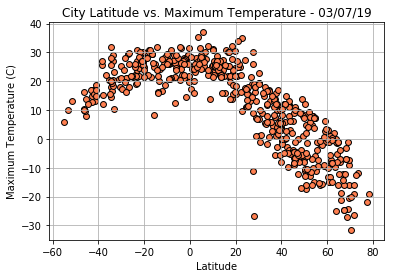

In [7]:
lat_temp_scatter=weather_summary.plot.scatter(x='Latitude',
                                              y='MaxTemp',
                                              c='coral',
                                              title=f"City Latitude vs. Maximum Temperature - {dt}",
                                              edgecolor='black',
                                              s=35,
                                              grid=True)
lat_temp_scatter.set_ylabel(f'Maximum Temperature (C)')
plt.savefig("City Latitude vs. Max Temp.png")

#### Latitude vs. Humidity Plot

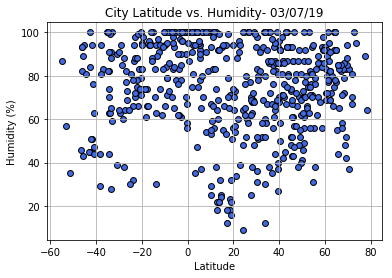

In [8]:
lat_hum_scatter=weather_summary.plot.scatter(x='Latitude',
                                              y='Humidity',
                                              c='royalblue',
                                              title=f"City Latitude vs. Humidity- {dt}",
                                              edgecolor='black',
                                              s=35,
                                              grid=True)
lat_hum_scatter.set_ylabel(f'Humidity (%)')
plt.savefig("City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

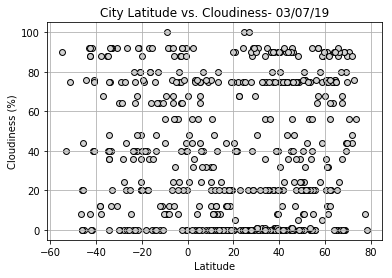

In [9]:
lat_cloud_scatter=weather_summary.plot.scatter(x='Latitude',
                                              y='Cloudiness',
                                              c='lightgrey',
                                              title=f"City Latitude vs. Cloudiness- {dt}",
                                              edgecolor='black',
                                              s=35,
                                              grid=True)
lat_cloud_scatter.set_ylabel(f'Cloudiness (%)')
plt.savefig("City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

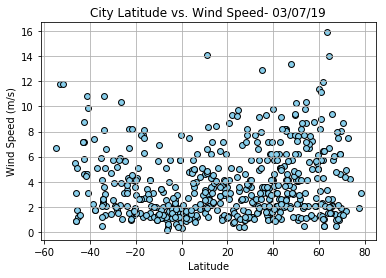

In [10]:
lat_wind_scatter=weather_summary.plot.scatter(x='Latitude',
                                              y='WindSpeed',
                                              c='skyblue',
                                              title=f"City Latitude vs. Wind Speed- {dt}",
                                              edgecolor='black',
                                              s=35,
                                              grid=True)
lat_wind_scatter.set_ylabel(f'Wind Speed (m/s)')
plt.savefig("City Latitude vs. Wind Speed.png")